In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [21]:
label = open('/home/usman/workspace/fisheye_images/box_2d_annotations/00007_FV.txt')

f = label.readlines()

In [29]:
# load the image
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/00007_FV.png')

In [30]:
patch_x, patch_y, patch_size = 100, 150, 600

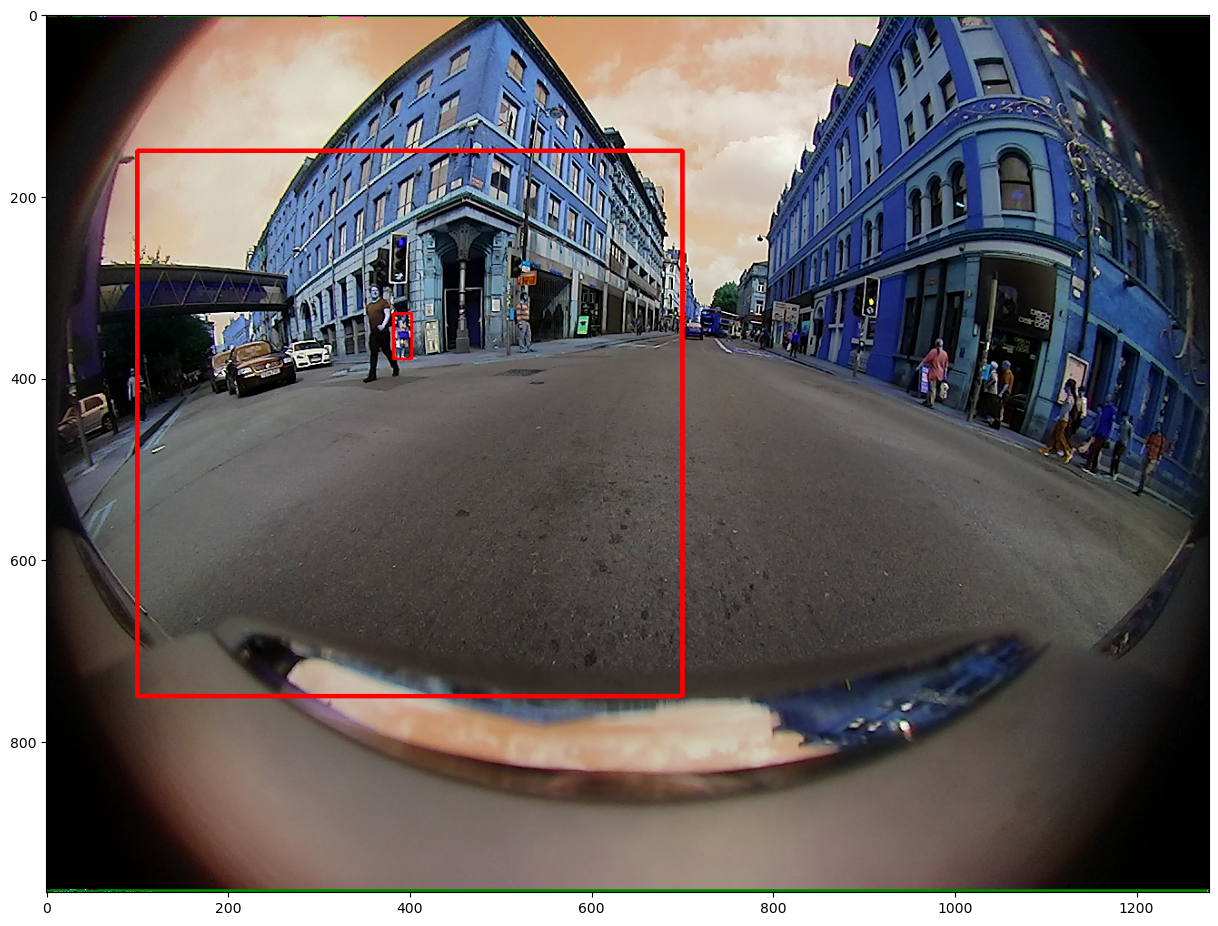

In [33]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/00007_FV.png')

700 339 723 359
100 700 150 750

cv2.rectangle(image, (patch_x, patch_y), (patch_x+patch_size, patch_y+patch_size), color = (255,0,0), thickness = 3)

# for box in f:
    
#     label_name, label_num, min_x, min_y, max_x, max_y = box.split(',')
    
#     min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
    
    
#     image = cv2.rectangle(image, (min_x, min_y), (max_x, max_y), color = (255,0,0), thickness = 2)

# 382,329,402,379

image = cv2.rectangle(image, (382, 329), (402, 379), color = (255,0,0), thickness = 2)

plt.figure(figsize=(15, 15))

plt.imshow(image)

In [22]:
f

['vehicles,0,700,339,723,359\n',
 'vehicles,0,195,359,274,421\n',
 'vehicles,0,262,357,314,393\n',
 'person,1,957,356,993,433\n',
 'person,1,1196,448,1232,529\n',
 'person,1,1089,405,1132,496\n',
 'person,1,1163,437,1197,513\n',
 'person,1,517,305,541,372\n',
 'person,1,815,345,829,378\n',
 'person,1,90,389,112,449\n',
 'person,1,382,329,402,379\n',
 'traffic_light,3,377,240,398,297\n',
 'traffic_light,3,898,287,918,334\n',
 'traffic_light,3,353,256,378,299\n',
 'traffic_light,3,887,295,900,331\n',
 'person,1,1019,381,1048,449\n',
 'person,1,1035,380,1064,457\n',
 'person,1,350,296,388,405\n',
 'vehicles,0,719,321,764,357\n',
 'person,1,1133,416,1179,507\n',
 'vehicles,0,11,415,79,486\n']

In [35]:
print(checkOverLap(957, 356, 993, 433, patch_x, patch_y, patch_x+patch_size, patch_y+patch_size))

# 382, 329), (402, 379
print(checkOverLap(382, 329, 402, 379, patch_x, patch_y, patch_x+patch_size, patch_y+patch_size))


957 356 993 433
100 150 700 750
--------------------
False
382 329 402 379
100 150 700 750
--------------------
True


In [9]:
patch_y, patch_y+patch_size

(150, 750)

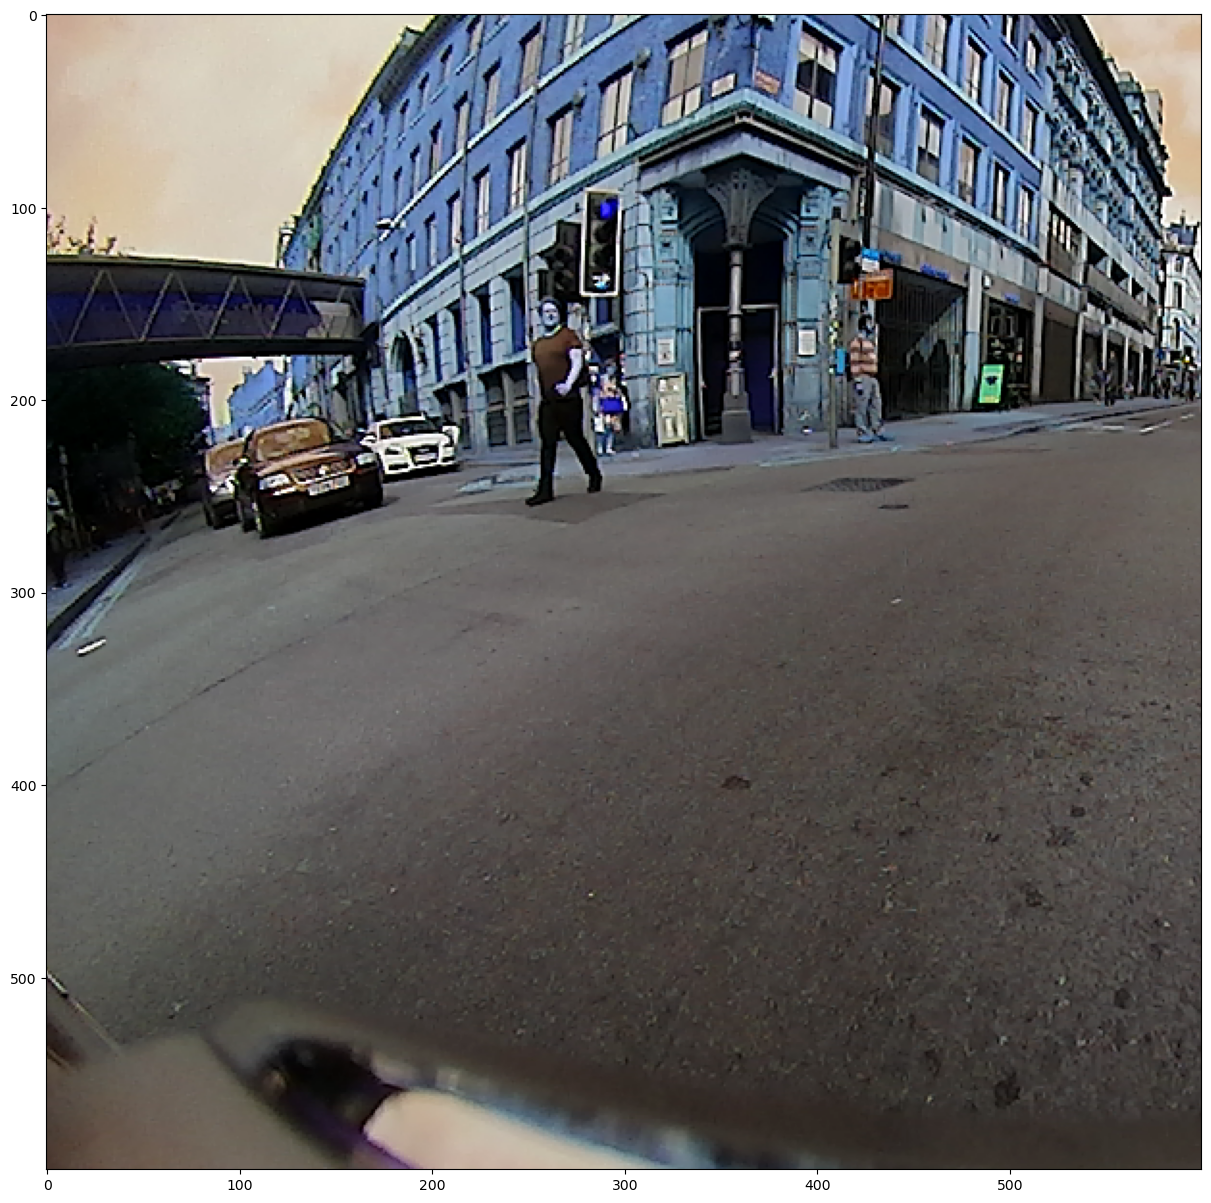

In [10]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/00007_FV.png')

patch_image = image[patch_y:patch_y+patch_size, patch_x:patch_x+patch_size]

plt.figure(figsize=(15, 15))
    
plt.imshow(patch_image)

In [ ]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/00007_FV.png')
# define some values
patch_center = np.array([500, 450])
patch_scale = 0.75

# calc patch position and extract the patch
smaller_dim = np.min(image.shape[0:2])
patch_size = int(patch_scale * smaller_dim)
patch_x = int(patch_center[0] - patch_size / 2.)
patch_y = int(patch_center[1] - patch_size / 2.)
patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

In [12]:
def checkOverLap(min_x1, min_y1, max_x1, max_y1, min_x2, min_y2, max_x2, max_y2):
    print(min_x1, min_y1, max_x1, max_y1)
    print(min_x2, min_y2, max_x2, max_y2)
    print('-'*20)
    min_x = max(min_x1, min_x2)
    min_y = max(min_y1, min_y2)
    
    max_x = min(max_x1, max_x2)
    max_y = min(max_y1, max_y2)
    
    if max_x - min_x < 0 or max_y - min_y < 0:
        return False
    return True

In [13]:
checkOverLap(0,0,2,2,1,1,3,3)

0 0 2 2
1 1 3 3
--------------------


True

In [38]:
boxes_in_bounds = []

for box in f:
    label_name, label_num, min_x, min_y, max_x, max_y = box.split(',')
    min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
#     if min_x < patch_x or max_y > patch_x+patch_size or min_y < patch_y or max_y > patch_y+patch_size:
    if checkOverLap(min_x, min_y, max_x, max_y, patch_x, patch_x+patch_size, patch_y, patch_y+patch_size) == False:
        continue
    else:
        min_x, min_y, max_x, max_y = int(min_x) - patch_y, int(min_y) - patch_x, int(max_x) - patch_y, int(max_y) - patch_x

    #     print(label_name, label_num, min_x, min_y, max_x, max_y)
        boxes_in_bounds.append([label_name, label_num, min_x, min_y, max_x, max_y])

700 339 723 359
100 700 150 750
--------------------
195 359 274 421
100 700 150 750
--------------------
262 357 314 393
100 700 150 750
--------------------
957 356 993 433
100 700 150 750
--------------------
1196 448 1232 529
100 700 150 750
--------------------
1089 405 1132 496
100 700 150 750
--------------------
1163 437 1197 513
100 700 150 750
--------------------
517 305 541 372
100 700 150 750
--------------------
815 345 829 378
100 700 150 750
--------------------
90 389 112 449
100 700 150 750
--------------------
382 329 402 379
100 700 150 750
--------------------
377 240 398 297
100 700 150 750
--------------------
898 287 918 334
100 700 150 750
--------------------
353 256 378 299
100 700 150 750
--------------------
887 295 900 331
100 700 150 750
--------------------
1019 381 1048 449
100 700 150 750
--------------------
1035 380 1064 457
100 700 150 750
--------------------
350 296 388 405
100 700 150 750
--------------------
719 321 764 357
100 700 150 750
-----

In [37]:
boxes_in_bounds

[]

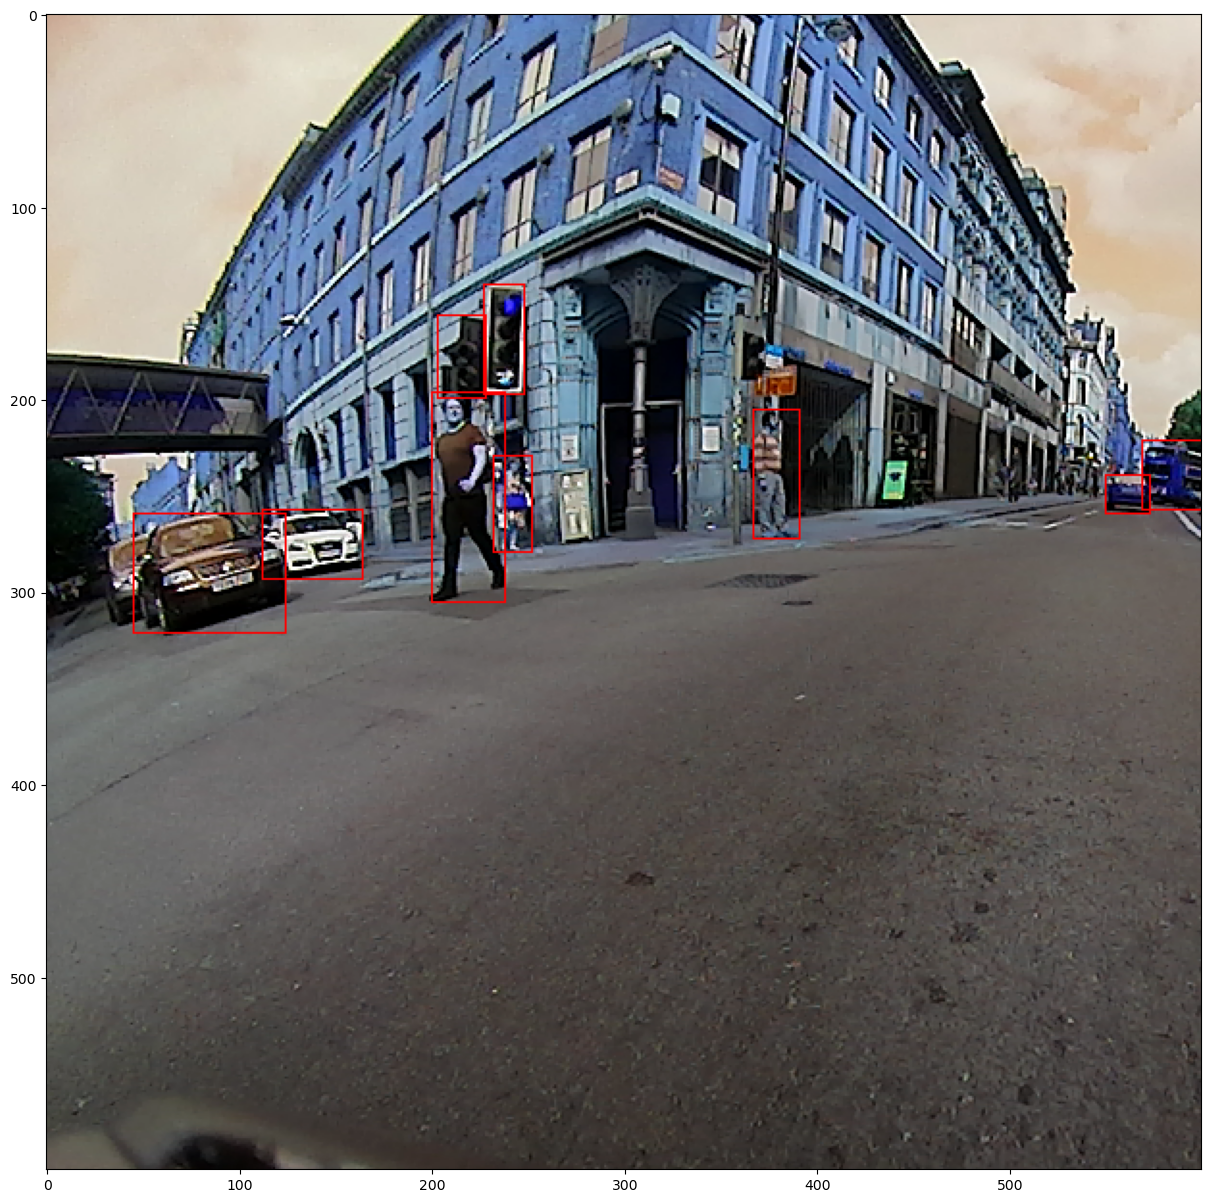

In [16]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/00007_FV.png')

patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

for box in boxes_in_bounds:
    
    label_name, label_num, min_x, min_y, max_x, max_y = box#.split(',')
    
    min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
        
    patch_image = cv2.rectangle(patch_image, (min_x, min_y), (max_x, max_y), color = (255,0,0), thickness = 1)

# min_x, min_y, max_x, max_y = 294, 191, 314, 241

# patch_image = cv2.rectangle(patch_image, (min_x, min_y), (max_x, max_y), color = (255,0,0), thickness = 1)

plt.figure(figsize=(15, 15))
    
plt.imshow(patch_image)

In [ ]:
smaller_dim